# Assignment 3

In this assignment, we were given a set of data from a Portuguese bank with relevant data that correlated to if the clients are subscribed to a product of this bank which is bank term deposit. 

In here, I compared 6 different classification method for the model that I made by comparing clients' demographics to their willingness to subscribe to the product.

The demographics that I mentioned are job list, marital status, and education level.

# Importing Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pydotplus
import sklearn.tree as tree

from IPython.display import Image

from six import StringIO

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Load Data

In [2]:
df = pd.read_csv("bank-full.csv", sep=(";"))

# Data Overview

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


#### Check if there are missing values

In [6]:
df.isnull().sum()/len(df)*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [7]:
df.isna().sum()/len(df)*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

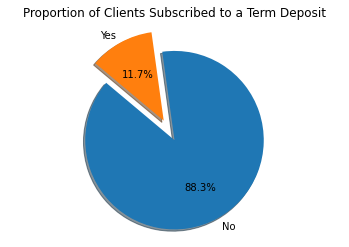

In [8]:
plt.pie(df["y"].value_counts(), labels=["No", "Yes"], explode=(0.25, 0),
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Proportion of Clients Subscribed to a Term Deposit")
plt.show()

There is only 11.7% of all clients that subscribed to a term deposit. Term deposit is not that popular to this Portuguese bank.

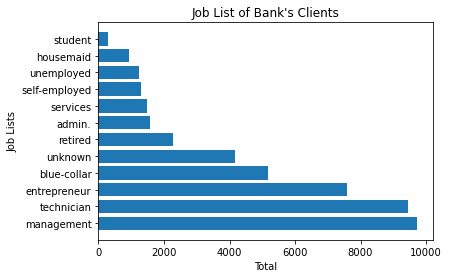

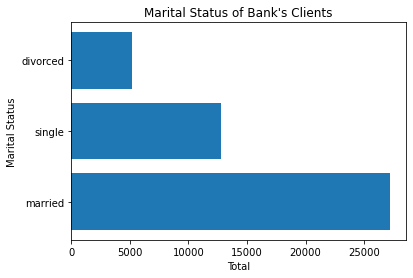

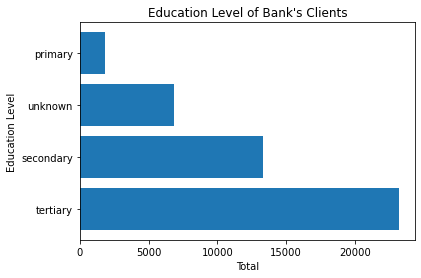

In [9]:
plt.barh(df["job"].unique(), list(df["job"].value_counts()))

plt.title("Job List of Bank's Clients")
plt.xlabel("Total")
plt.ylabel("Job Lists")
plt.show()


plt.barh(df["marital"].unique(), list(df["marital"].value_counts()))

plt.title("Marital Status of Bank's Clients")
plt.xlabel("Total")
plt.ylabel("Marital Status")
plt.show()


plt.barh(df["education"].unique(), list(df["education"].value_counts()))

plt.title("Education Level of Bank's Clients")
plt.xlabel("Total")
plt.ylabel("Education Level")
plt.show()

These graphs showed the demographics of bank's clients. The clients that use this bank are mostly married with tertiary education (college/university) work in an either management or technician job.

# Pre-Processing

### Encoding Data 

In [10]:
encoder = LabelEncoder()
enc_y = encoder.fit_transform(df["y"])
enc_job = encoder.fit_transform(df["job"])
enc_marital = encoder.fit_transform(df["marital"])
enc_education = encoder.fit_transform(df["education"])
features = list(zip(enc_job, enc_education, enc_marital))

print(enc_y)
print(enc_job)
print(enc_marital)
print(enc_education)
print(features)

[0 0 0 ... 1 0 0]
[4 9 2 ... 5 1 2]
[1 2 1 ... 1 1 1]
[2 1 1 ... 1 1 1]
[(4, 2, 1), (9, 1, 2), (2, 1, 1), (1, 3, 1), (11, 3, 2), (4, 2, 1), (4, 2, 2), (2, 2, 0), (5, 0, 1), (9, 1, 2), (0, 1, 0), (0, 1, 2), (9, 1, 1), (9, 3, 1), (7, 1, 1), (5, 0, 1), (0, 3, 2), (1, 0, 1), (5, 0, 1), (7, 1, 1), (1, 1, 1), (4, 2, 1), (1, 0, 2), (7, 1, 1), (5, 0, 1), (0, 1, 1), (4, 2, 2), (2, 1, 1), (4, 1, 2), (9, 1, 2), (9, 1, 1), (4, 2, 1), (0, 1, 1), (1, 1, 1), (4, 2, 1), (9, 1, 0), (1, 1, 1), (9, 1, 1), (0, 1, 0), (0, 1, 2), (7, 1, 0), (4, 1, 1), (1, 3, 1), (5, 1, 1), (5, 3, 1), (0, 0, 2), (6, 2, 1), (9, 1, 1), (9, 1, 0), (4, 2, 2), (1, 1, 1), (4, 2, 0), (4, 2, 1), (0, 1, 2), (9, 1, 2), (2, 2, 2), (4, 2, 2), (1, 3, 1), (1, 3, 2), (7, 0, 1), (0, 2, 1), (9, 1, 0), (1, 0, 1), (7, 1, 1), (1, 3, 1), (4, 2, 1), (5, 2, 1), (4, 2, 0), (9, 1, 1), (1, 1, 2), (1, 1, 1), (7, 1, 1), (4, 1, 1), (1, 0, 1), (9, 1, 1), (9, 1, 1), (1, 1, 1), (7, 1, 0), (7, 1, 0), (7, 1, 0), (0, 1, 2), (7, 1, 0), (9, 1, 2), (0, 1, 1), (6

### Split Dataset

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    features, enc_y, test_size=.3, 
    random_state=11
)

### Making a Function to Train the Model

In [12]:
def train_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    train_acc = model.score(x_train, y_train)

    test_pred = model.predict(x_test)
    test_acc = model.score(x_test, y_test)

    print("-- training performance --")
    print("target:\n", y_train)
    print("prediction:\n", train_pred)
    print("accuracy score:\n", train_acc)
    print()
    print("-- test performance --")
    print("target:\n", y_test)
    print("prediction:\n", test_pred)
    print("accuracy score:\n", test_acc)
    
    print(classification_report(y_test, test_pred))
    print(confusion_matrix(y_test, test_pred))


In [13]:
logistic = LogisticRegression()
svc = SVC()
bayes = GaussianNB()
forest = RandomForestClassifier()
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()

# Run the Code

In [14]:
for model in [logistic, svc, bayes, forest, knn, dtree]:
    print("Training", model.__class__)
    train_model(model, x_train, x_test, y_train, y_test)
    print("===")

Training <class 'sklearn.linear_model._logistic.LogisticRegression'>
-- training performance --
target:
 [1 0 0 ... 0 0 0]
prediction:
 [0 0 0 ... 0 0 0]
accuracy score:
 0.8828956931146712

-- test performance --
target:
 [0 0 0 ... 0 0 0]
prediction:
 [0 0 0 ... 0 0 0]
accuracy score:
 0.88329401356532
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11981
           1       0.00      0.00      0.00      1583

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564

[[11981     0]
 [ 1583     0]]
===
Training <class 'sklearn.svm._classes.SVC'>


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-- training performance --
target:
 [1 0 0 ... 0 0 0]
prediction:
 [0 0 0 ... 0 0 0]
accuracy score:
 0.8828956931146712

-- test performance --
target:
 [0 0 0 ... 0 0 0]
prediction:
 [0 0 0 ... 0 0 0]
accuracy score:
 0.88329401356532
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11981
           1       0.00      0.00      0.00      1583

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564

[[11981     0]
 [ 1583     0]]
===
Training <class 'sklearn.naive_bayes.GaussianNB'>


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-- training performance --
target:
 [1 0 0 ... 0 0 0]
prediction:
 [0 0 0 ... 0 0 0]
accuracy score:
 0.8828956931146712

-- test performance --
target:
 [0 0 0 ... 0 0 0]
prediction:
 [0 0 0 ... 0 0 0]
accuracy score:
 0.88329401356532
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11981
           1       0.00      0.00      0.00      1583

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564

[[11981     0]
 [ 1583     0]]
===
Training <class 'sklearn.ensemble._forest.RandomForestClassifier'>


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-- training performance --
target:
 [1 0 0 ... 0 0 0]
prediction:
 [0 0 0 ... 0 0 0]
accuracy score:
 0.8829272916864158

-- test performance --
target:
 [0 0 0 ... 0 0 0]
prediction:
 [0 0 0 ... 0 0 0]
accuracy score:
 0.88329401356532
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11981
           1       0.00      0.00      0.00      1583

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564

[[11981     0]
 [ 1583     0]]
===
Training <class 'sklearn.neighbors._classification.KNeighborsClassifier'>


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-- training performance --
target:
 [1 0 0 ... 0 0 0]
prediction:
 [1 0 0 ... 0 0 0]
accuracy score:
 0.8585963914431067

-- test performance --
target:
 [0 0 0 ... 0 0 0]
prediction:
 [0 0 0 ... 0 0 0]
accuracy score:
 0.8605868475375995
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     11981
           1       0.15      0.04      0.07      1583

    accuracy                           0.86     13564
   macro avg       0.52      0.51      0.49     13564
weighted avg       0.80      0.86      0.82     13564

[[11607   374]
 [ 1517    66]]
===
Training <class 'sklearn.tree._classes.DecisionTreeClassifier'>
-- training performance --
target:
 [1 0 0 ... 0 0 0]
prediction:
 [0 0 0 ... 0 0 0]
accuracy score:
 0.8829272916864158

-- test performance --
target:
 [0 0 0 ... 0 0 0]
prediction:
 [0 0 0 ... 0 0 0]
accuracy score:
 0.88329401356532
              precision    recall  f1-score   support

           0       0.88      1.00      0.94

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression = 88.3%
Support Vector Machine = 88.3%
Naive Bayes = 88.3%
Random Forrest = 88.3%
K-Nearest Neighbors = 86.1%
Decision Tree = 88.3%

According to these test results, all of the methods, except K-Nearest Neighbors, have the same accuracy. This result backed by the pie chart above that 88.3% of people aren't subscribe to the product. 

Confusion matrix in all of the methods looked good, except in K-Nearest Neighbors. There are about 440 data that weren't go through correctly.